In [301]:
from __future__ import division
import numpy as np
import sys
import math
from scipy import special as sp
import matplotlib.pyplot as plt
#Universal Constants
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters

In [287]:
#Define derivative functions


def adot(y,constants):
    
    e = y[0]
    a = y[2]
    
    mu1 = constants[4]
    M = constants[5]
    
    da_GW = -64/5 * G**3*mu1*M**2/(c**5 * a**3) * (1-e**2)**(-7/2) * (1 + 73*e**2 / 24 + 37*e**4 / 96)


    return da_GW

    

def edot(y,constants):
    e = y[0]
    gamma = y[1]
    a = y[2]
    
    K = constants[0]
    J1 = constants[1]
    I = constants[3]
    mu1 = constants[4]
    M = constants[5]
    
    de_Kozai = 5*K*e*(1-e**2)*(1-np.cos(I)**2)*np.sin(2*gamma)/J1 
    de_GW = -304/15 * G**3*mu1*M**2/(c**5*a**4) * e/(1-e**2)**(5/2) * (1+121*e**2/304)

    return de_Kozai + de_GW


def gdot(y,constants):
    
    e = y[0]
    gamma = y[1]
    a = y[2]
    
    K = constants[0]
    J1 = constants[1]
    J2 = constants[2]
    I = constants[3]
    mu1 = constants[4]
    M = constants[5]
    
    
    dg_part1 = 2*(1-e**2) - 5*(1-e**2 - np.cos(I)**2)*np.sin(gamma)**2
    dg_part2 = (1 - e**2 + 5*e**2 * np.cos(gamma)**2)*np.cos(I)
    dg_PN=3/(c**2*a*(1-e**2)) * (G*M/a)**(3/2)
    dg_KL = 2*K*(dg_part1/J1 + dg_part2/J2)
    
    
    return dg_KL + dg_PN    
    


In [522]:
#Define all functions
def plot_e(data):
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    
    t = data[:,0] / (365*24*3600)
    e = data[:,1]
    
    
    print (t[-1], t[-2])
    
    ax1.plot(t,e)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    
    
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    
    ax1.set_ylabel('$e$', fontsize = fs)
    ax1.set_xlabel('t [years]',fontsize=fs)
    
    #ax1.set_xlim(0,0.1)
    #ax1.set_ylim()
    
    
    plt.savefig('../../Manuscript/figures/e_example.png', dpi=300)
    
    
def plot_g(data):
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    
    t = data[:,0] / (365*24*3600)
    g = data[:,2]
    
    ax1.plot(t,g)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    
    
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    
    ax1.set_ylabel(r'$\gamma$', fontsize = fs)
    ax1.set_xlabel('t [years]',fontsize=fs)
    
    
    plt.savefig('../../Manuscript/figures/g_example.png', dpi=300)



def plot_compare_ecc(data1,data2):
    
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot2grid((1,1), (0,0))

    
    
    t = data1[:,0] / (365*24*3600)
    e1 = data1[:,1]
    e2 = data2[:,1]
    


    
    ax1.plot(t,e1)
    ax1.plot(t,e2)
    

    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    



    ax1.tick_params(axis='both', which='major', labelsize=fs)



    ax1.set_xlabel('t [years]',fontsize=fs)
    ax1.set_ylabel('$e$', fontsize = fs)


    de = 0.5-0.49975
    
    #ax1.set_xlim(0,0.1)
    #ax1.set_ylim(0.49975,0.5+de )
    

    

def plot_compare(data1,data2):
    
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot2grid((3,1), (0,0))
    ax2 = plt.subplot2grid((3,1), (1,0), sharex=ax1)
    ax3 = plt.subplot2grid((3,1), (2,0),sharex=ax1)
    
    
    t = data1[:,0] / (365*24*3600)
    e1 = data1[:,1]
    e2 = data2[:,1]
    
    g1 = data1[:,2]
    g2 = data2[:,2]
    
    a1 = data1[:,3] / AU
    a2 = data1[:,3] / AU
    

    
    ax1.plot(t,e1)
    ax1.plot(t,e2)
    
    ax2.plot(t,g1)
    ax2.plot(t,g2)
    
    ax3.plot(t,a1)
    ax3.plot(t,a2)
    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    ax3.tick_params(axis='both', which='major', labelsize=fs)


    ax3.set_xlabel('t [years]',fontsize=fs)



    ax1.set_ylabel('$e$', fontsize = fs)
    ax2.set_ylabel(r'$\gamma$', fontsize = fs)
    ax3.set_ylabel(r'$a$ [AU]', fontsize = fs)
    
    
    SSres = np.sum((e1 - e2)**2)
    SStot = np.sum((e1 - np.average(e1))**2)
    
    R2 = 1 - SSres/SStot
    
    
    ax1.set_xlim(0,0.1)
    
    
    plt.subplots_adjust(hspace=-0.01)


    print (R2)
    
    # Save just the portion _inside_ the second axis's boundaries
  #  extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

    # Pad the saved area by 10% in the x-direction and 20% in the y-direction
   # fig.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/just_e.png', bbox_inches=extent.expanded(1.1, 1.2))
    

    

    
    
    
    



def plotit(data):
    
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((3,1), (0,0)) 
    ax2 = plt.subplot2grid((3,1), (1,0)) 
    ax3 = plt.subplot2grid((3,1), (2,0)) 
    
    t = data[:,0] / (365*24*3600)
    e = data[:,1]
    g = data[:,2]
    a = data[:,3]

    
    fs = 25
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    ax3.tick_params(axis='both', which='major', labelsize=fs)


    ax.set_xlabel('t [years]',fontsize=fs)
    ax2.set_xlabel('t [years]',fontsize=fs)


    ax1.set_ylabel('$e$', fontsize = fs)
    ax2.set_ylabel(r'$\gamma$', fontsize = fs)
    ax3.set_ylabel(r'$a$', fontsize = fs)
    

    

    
    ax1.plot(t,e)
    ax2.plot(t,g)
    ax3.plot(t,a)
    
    
    #Save the subplots 
    



def sma(M,f):
    #Total mass, orbital frequency
    return (G*M/(2*np.pi*f)**2)**(1/3)

def ang_mom(m1,m2,a):
    M = m1+m2
    return m1*m2 * np.sqrt(G*a/M)


def setup(m0,m1,m2,f1,e1,e2):
    
    #Masses
    M = m0+m1
    mu1 = (m0*m1)/(m0+m1)

    #Inner Binary calcs
    eps1 = 1-e1**2
    a1 = sma(m0+m1,f1)#semi major axis via K3
    J1 = ang_mom(m0,m1,a1)
    
    #Outer Binary
    eps2 = 1-e2**2
    a2 = beta*a1
    J2 = ang_mom(m0+m1,m2,a2)


    
    #Other
    K = 3*G*m0*m1*m2*a1**2 / (8*(m0+m1) * a2**3*(1-e2**2)**(3/2))
    

    
    
    return K,J1,J2,mu1,M,a1




def derivs(y,constants):

    e_dot = edot(y,constants)
    gamma_dot = gdot(y,constants)
    a_dot = adot(y,constants)


    return np.array((e_dot, gamma_dot,a_dot))





def RungeKutta(yn,constants,Tint,Tres):
    
    #Setup timing precision
    trange= np.linspace(0,Tint,Tres)
    h = trange[1] - trange[0]
    t = 0
    nsteps = int(Tint/h)
    
    #Define output array
    out = np.zeros((nsteps,4)) #t,e,gamma,a
    counter = 0
    out[counter,0] = t
    out[counter,1] = yn[0]
    out[counter,2] = yn[1] 
    out[counter,3] = yn[2] 
    counter = counter + 1

    
    
    
    while t < Tint:
        


        
        k1 = h * derivs(yn,constants)
        k2 = h * derivs(yn+k1/2,constants)
        k3 = h * derivs(yn+k2/2,constants)
        k4 = h * derivs(yn+k3,constants)

        
        ynew = yn + (k1 + 2*k2 + 2*k3 + k4)/6
        
    
        yn = ynew
    
        t = t + h
        
        if counter < nsteps:
            out[counter,0] = t
            out[counter,1] = yn[0]
            out[counter,2] = yn[1]  
            out[counter,3] = yn[2] 
        
        
            counter = counter + 1
    
        
        
    return out



def numerical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres):
    
    #Calculate some constants and useful values
    K,J1,J2,mu1,M,a1 = setup(m0,m1,m2,f1,e1,e2)
    
    #Set up for runge Kutta
    yn = np.array((e1,gamma,a1))

    constants = np.array((K,J1,J2,I,mu1,M))
    
    

    
    T_seconds = Tint*365*24*3600
    
    output = RungeKutta(yn,constants,T_seconds,Tres)
    
    return output
    
    
def analytical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres):
    
    #Calculate some constants and useful values
    K,J1,J2,mu1,M,a1 = setup(m0,m1,m2,f1,e1,e2)
    
    
    #Define time variable
    
    #------Cumbersome way to get the same time points as in the numerical case
    T_seconds = Tint*365*24*3600
    trange= np.linspace(0,T_seconds,Tres)
    h = trange[1] - trange[0]
    t=0
    nsteps = int(T_seconds/h)
    
    out = np.zeros((nsteps,4))
                   
    counter = 0
    out[counter,0] = t
    counter = counter +1
                               
                   
    
    while t < T_seconds:
        
        t = t + h
        if counter < nsteps:
            out[counter,0] = t
            counter = counter + 1
    #------Cumbersome way to get the same time points as in the numerical case
    

    t = out[:,0]
    

    #Get approx gamma
    y = np.array((e1,gamma,a1))
    constants = np.array((K,J1,J2,I,mu1,M))
    dg = gdot(y,constants)
    approx_gamma = t*dg + gamma

  
    
    #Get approx a
    fe = (1-e1**2)**(-7/2) * (1 + 73*e1**2 /24 + 37*e1**4 / 96)
    ge = e*(1-e**2)**(-5/2) * (1 + 121*e**2/304)
    
    
    Cprime = -64*G**3 * mu1 * M**2 / (5 * c**5)
    prefactor = e*(1-e**2)
        

    approx_a = (4*Cprime*fe*t + a1**4)**(1/4)

    
    #Finally determine approx e
    CC = np.log(e1) - 0.5*np.log(1-e1**2)
    AA = 5*K*(1-np.cos(I)**2)/J1
    alpha = -AA*np.cos(2*approx_gamma)/(2*dg) + CC
    
    alpha_GW = 19/(48*fe) * (np.log(approx_a**4) - np.log(a1**4)) * (1-e1**2)**(-7/2) * (1+121*e1**2/304)
    alpha = alpha +alpha_GW
    approx_e = np.exp(alpha)/np.sqrt(1+np.exp(2*alpha)) 
            
        
        
    #Check weak-coupling condition
    print ('Condition 1:', m2/M * (1/beta)**3)
    print ('Condition 2:', mu1/M * (1/beta)**2)

        
    
    #output
    out[:,0] = t
    out[:,1] = approx_e
    out[:,2] = approx_gamma
    out[:,3] = approx_a

    
    return out



    

In [525]:
#Set up initial system parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
beta=10
m2 = 10*Msolar
e2 =0.6
I = 60 * np.pi/180.0 #Inclination
gamma = np.pi/4


Tint = 5 #years
Tres = int(4e4) #Effective timing resolution. Bigger numbers = better

output = numerical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres)
output_analytical = analytical_soln(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres)

Condition 1: 0.0001666666666666667
Condition 2: 0.0025000000000000005


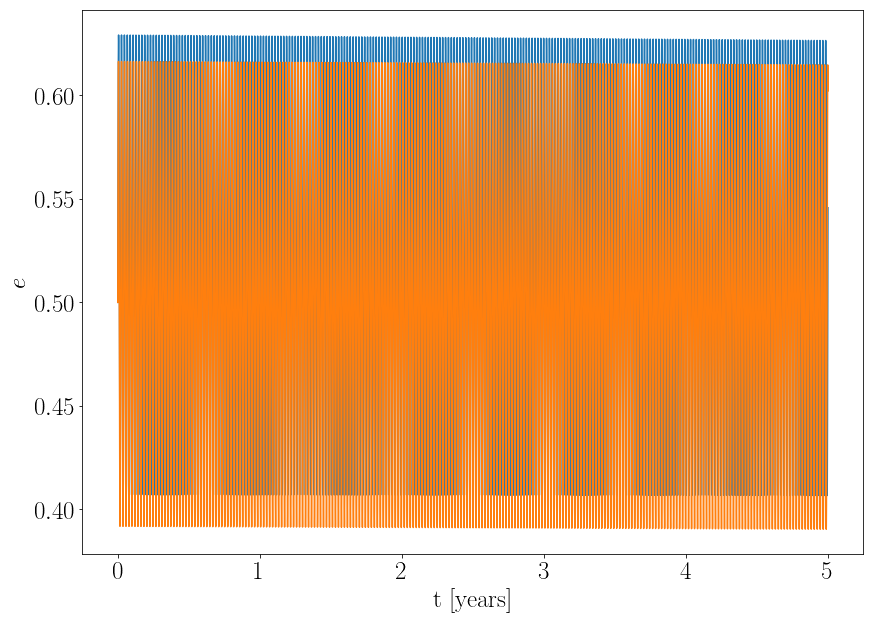

In [517]:
%matplotlib inline


#Plot the output



#plot_compare(output,output_analytical)
#plt.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/test.png', dpi=300)

#print (output)
plot_compare_ecc(output,output_analytical)
plt.savefig('/Users/tomkimpson/PhD/PI/PI Work/Manuscript/figures/just_e1000.png', dpi=300)

3.0094242101619084 4.884311999533223


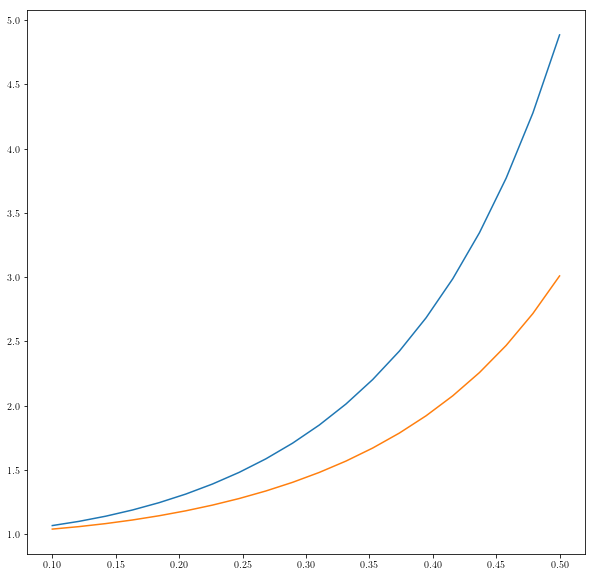

In [410]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1), (0,0))
e = np.linspace(0.1,0.5,20)
fe = (1-e**2)**(-7/2) * (1 + 73*e**2/24 + 37*e**4/96)
ge = e*(1-e**2)**(-5/2) * (1 + 121*e**2/304)
prefactor = e*(1-e**2)
ax1.plot(e,fe)
ax1.plot(e,prefactor**(-1)*ge)

out1 = prefactor**(-1)*ge
out2 = fe
print (out1[-1],out2[-1])


In [407]:
(6.67e-11)**3 / (3e8)**5

1.2211562263374486e-73